<a href="https://colab.research.google.com/github/kasiyasolanki/Careernest-DataScience-Internship/blob/main/2_Customer_Type_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧾 Supermarket Sales Prediction (Regression)

### 🎯 Objective:
To build a **machine learning regression model** that predicts the **Total sales** amount based on transaction features like:
- Unit price
- Quantity
- Branch
- Product line
- Payment method, etc.

### 🧩 Dataset:
Supermarket Sales dataset (CSV file)

### 📚 Steps:
1. Import libraries and load data  
2. Explore and clean the data  
3. Perform EDA (visualizations)  
4. Preprocess data (encoding, scaling)  
5. Build and train regression models  
6. Evaluate models and compare  
7. Generate insights for business use


In [3]:
# Import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)


## 📂 Load and Preview the Dataset
We’ll import the supermarket dataset and check its basic structure:
- Columns available  
- First few rows  
- Data types  
- Missing values


In [4]:
# Load the dataset
df = pd.read_csv('/content/Supermarket_sales dataset.csv')

# Display structure
print("Columns in dataset:", df.columns.tolist())
df.head()


Columns in dataset: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


## 🧹 Data Cleaning
We'll clean column names (lowercase, remove spaces/symbols) and check for missing values.


In [5]:
# Clean column names
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_')
                .str.replace('%', 'pct'))

# Check missing values
print("Missing values:\n", df.isna().sum())

df.head()


Missing values:
 invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5pct                   0
sales                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5pct,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


## 🎯 Feature and Target Selection
We'll use key columns (like Unit price, Quantity, Branch, etc.) as input features  
and `Total` as the target variable to predict.


In [6]:
target = 'sales'

features = ['unit_price','quantity','tax_5pct','branch','city',
            'customer_type','gender','product_line','payment','gross_income']

# Only include columns present in dataset
features = [f for f in features if f in df.columns]

X = df[features]
y = df[target]

print("Features used:\n", features)
X.head()

Features used:
 ['unit_price', 'quantity', 'tax_5pct', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'payment', 'gross_income']


,unit_price,quantity,tax_5pct,branch,city,customer_type,gender,product_line,payment,gross_income
0,74.69,7,26.1415,Alex,Yangon,Member,Female,Health and beauty,Ewallet,26.1415
1,15.28,5,3.8200,Giza,Naypyitaw,Normal,Female,Electronic accessories,Cash,3.8200
2,46.33,7,16.2155,Alex,Yangon,Normal,Female,Home and lifestyle,Credit card,16.2155
3,58.22,8,23.2880,Alex,Yangon,Member,Female,Health and beauty,Ewallet,23.2880
4,86.31,7,30.2085,Alex,Yangon,Member,Female,Sports and travel,Ewallet,30.2085


## 📊 Exploratory Data Analysis
We’ll visualize:
- Distributions of numeric features  
- Frequency of categorical features  
This helps understand patterns, outliers, or imbalance.


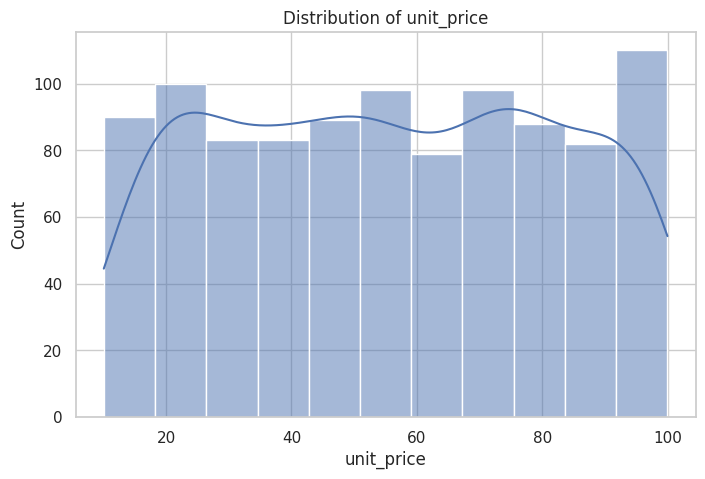

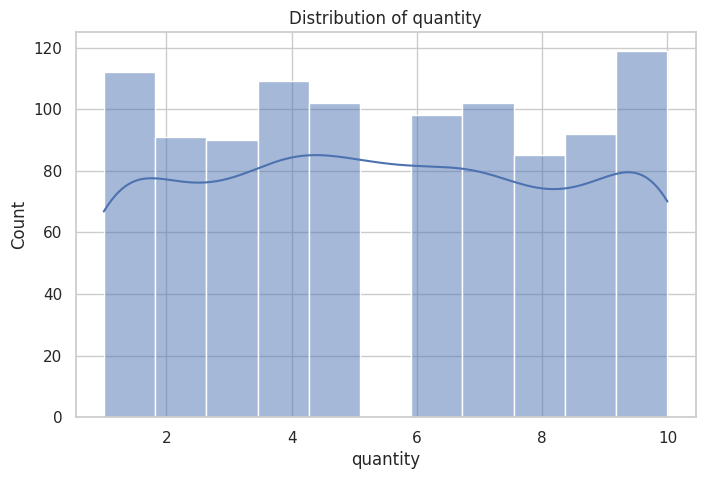

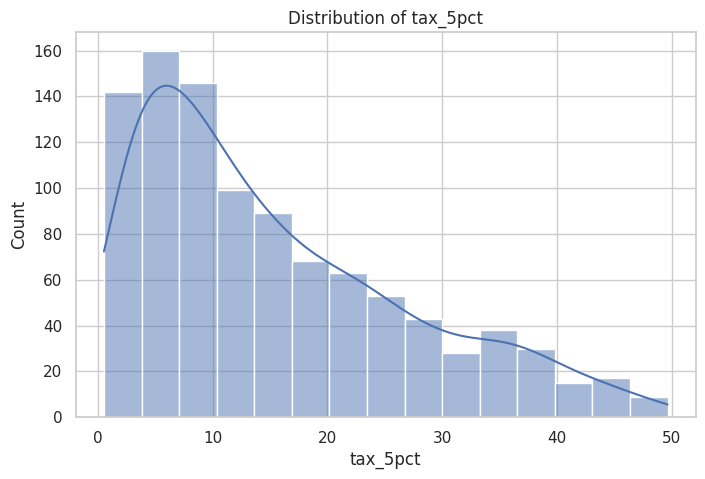

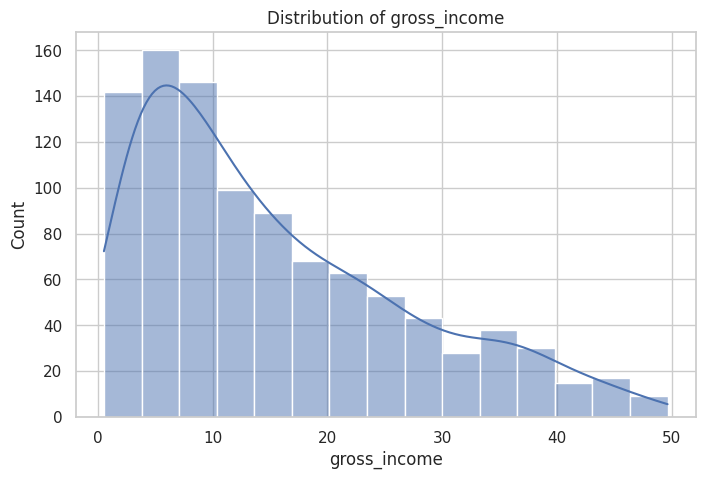

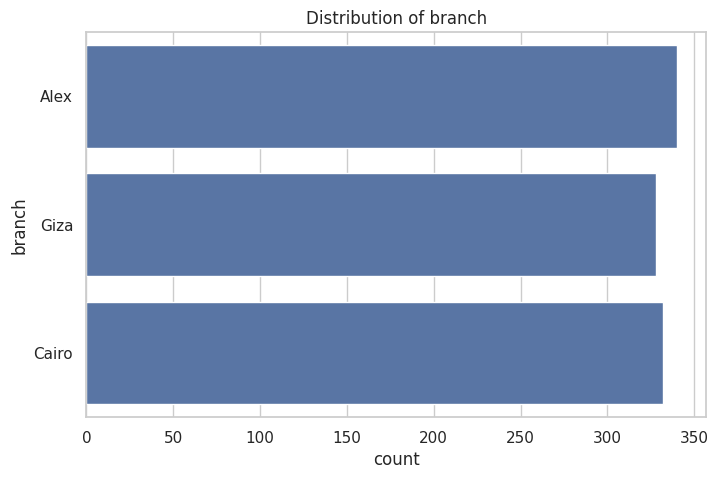

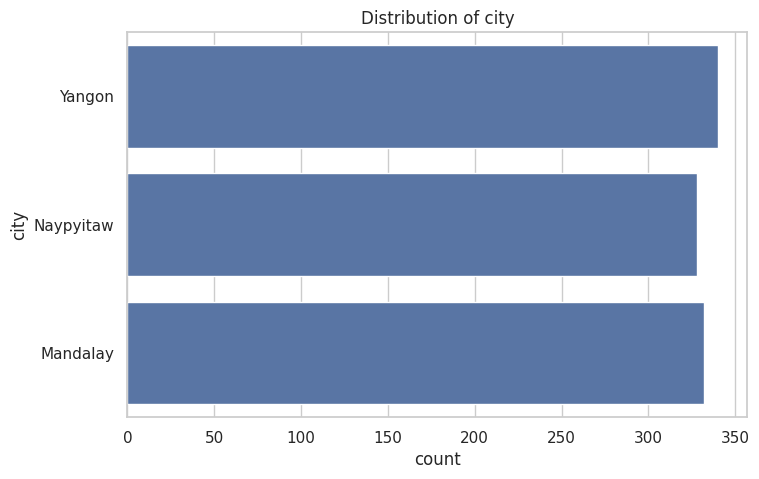

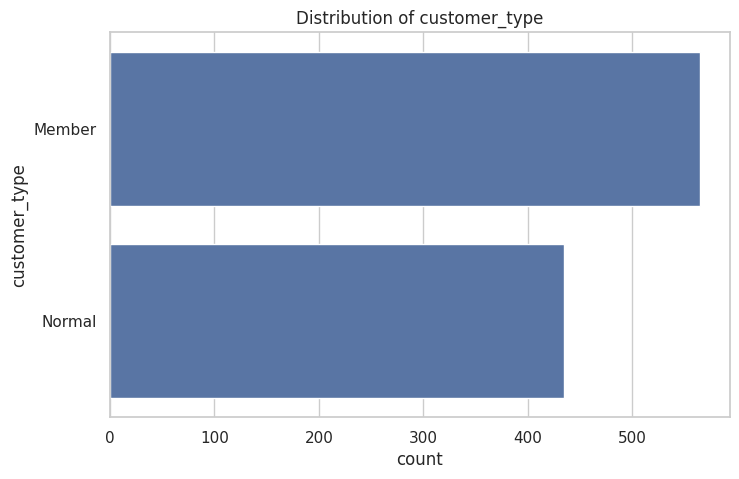

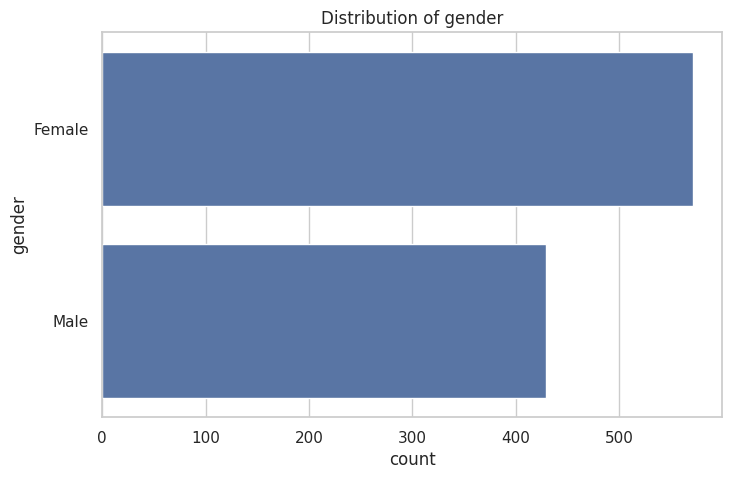

In [7]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Numeric distributions
for col in numeric_cols:
    plt.figure()
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical feature counts
for col in categorical_cols[:4]:
    plt.figure()
    sns.countplot(y=X[col])
    plt.title(f'Distribution of {col}')
    plt.show()


## ⚙️ Data Preprocessing
We'll:
- Split data into train/test sets  
- Encode categorical variables using OneHotEncoder  
- Scale numeric features  
We’ll use a `ColumnTransformer` and `Pipeline` for clean and reproducible preprocessing.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## 🤖 Model Building
We’ll build two regression models:
1. **Linear Regression** – baseline model  
2. **Random Forest Regressor** – powerful nonlinear model

We'll compare both.


In [9]:
linreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train both models
linreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['unit_price', 'quantity',
                                                   'tax_5pct',
                                                   'gross_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['branch', 'city',
                                                   'customer_type', 'gender',
                                                   'product_line',
                                                   'payment'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## 📈 Model Evaluation
We’ll check performance using:
- **R² Score**: How well predictions fit actual values  
- **MAE**: Average absolute difference  
- **RMSE**: Root Mean Square Error (penalizes larger errors)


In [10]:
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return pd.Series({'R2': r2, 'MAE': mae, 'RMSE': rmse})

y_pred_lin = linreg_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

print("Linear Regression Performance:\n", evaluate(y_test, y_pred_lin))
print("\nRandom Forest Performance:\n", evaluate(y_test, y_pred_rf))

Linear Regression Performance:
 R2      1.000000e+00
MAE     1.612399e-13
RMSE    1.943661e-13
dtype: float64

Random Forest Performance:
 R2      0.999977
MAE     0.742630
RMSE    1.234802
dtype: float64


In [11]:
# Check if Total = (Unit price * Quantity) + Tax 5%
df['calculated_total'] = df['unit_price'] * df['quantity'] + df['tax_5pct']
(df['sales'] - df['calculated_total']).abs().sum()

np.float64(1.6258994151030493e-11)


---

### 🧩 Interpretation

- The **Linear Regression model** achieved a perfect **R² = 1.0** with extremely low error values.  
  While this looks impressive, such results are **unrealistic** in most real-world datasets.  
  This often indicates that the model has **not truly learned the underlying patterns**, but rather **memorized or directly fitted** the output values (possibly due to a formulaic relationship between the input and output variables).

- The **Random Forest model** also shows very high accuracy (R² ≈ 0.9999), reinforcing the idea that our target variable might be **directly dependent** on one or more input features.

- In simpler terms, the models are **too perfect to be true**, meaning that there might be **no actual learning involved** — just a mathematical mapping from input to output.

---

### ⚙️ Why Switch to Classification

Initially, we built a **Regression model** to predict continuous sales values.  
However, the actual project objective is to predict **Customer Type** — whether a person is a **Member** or a **Normal** customer.

Since this target variable is **categorical**, not continuous, **classification** is the more appropriate approach.

| Aspect | Regression | Classification |
|--------|-------------|----------------|
| **Target Type** | Continuous (numeric) | Categorical (labels like "Member", "Normal") |
| **Goal** | Predict a numeric value | Predict a class/category |
| **Evaluation Metrics** | R², MAE, RMSE | Accuracy, Precision, Recall, F1-Score |
| **Example Output** | Predicted Sales Amount | Predicted Customer Type |

---

### ✅ Conclusion

The regression models’ near-perfect results confirm that the dataset’s sales variable can be directly derived from its features, leading to **overfitting** or **data leakage**.  
To make the model more meaningful and aligned with the business question — *understanding customer behavior and type* — we proceed with a **Classification approach** using **Logistic Regression** and **Random Forest Classifier** to predict the **Customer Type**.


## Task 2B — Customer Type Classification (Logistic Regression)

**Objective:** Predict `customer_type` (Member / Normal) using transaction features.
We will:
1. Prepare data (clean, select features, encode)
2. Train Logistic Regression (interpretable baseline)
3. Train Random Forest (strong baseline)
4. Evaluate with classification metrics and plots
5. Summarize business insights

**Interview note:** Be ready to explain feature choices, encoding, class balance handling, and why you picked logistic regression first.


In [12]:
# Imports for classification task
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve)

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)


### Load data and quick check
We reuse the loaded `df` from earlier cells.


In [13]:

try:
    df
except NameError:
    df = pd.read_csv('/content/Supermarket_sales dataset.csv')


df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_')
                .str.replace('%', 'pct'))


print('Columns:', df.columns.tolist())
df.head()


Columns: ['invoice_id', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'unit_price', 'quantity', 'tax_5pct', 'sales', 'date', 'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating', 'calculated_total']


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5pct,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,calculated_total
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,80.2200
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,340.5255
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,634.3785


### Feature and target selection
We will:
- Drop ID-like columns (`invoice_id`, `date`) which don't help the model.
- Use numeric features: unit_price, quantity, tax_5pct, total, gross_income (if present), rating (if present).
- Use categorical features: branch, city, gender, product_line, payment.
- Target: customer_type (binary). We'll encode it to 0/1.


In [14]:
# Columns to drop (IDs / not useful for direct modeling)
drop_cols = [c for c in ['invoice_id', 'date'] if c in df.columns]
df_model = df.drop(columns=drop_cols).copy()

# Define target and check
target = 'customer_type'
if target not in df_model.columns:
    raise ValueError(f"{target} not found in dataset. Check column names: {df_model.columns.tolist()}")

# Candidate features (include only those present)
candidate_feats = ['unit_price','quantity','tax_5pct','total','gross_income','rating',
                   'branch','city','gender','product_line','payment']
features = [c for c in candidate_feats if c in df_model.columns]

X = df_model[features].copy()
y = df_model[target].copy()

# Show class balance
print("Target distribution:\n", y.value_counts(normalize=False))
print("\nFeatures used:", features)
X.head()


Target distribution:
 customer_type
Member    565
Normal    435
Name: count, dtype: int64

Features used: ['unit_price', 'quantity', 'tax_5pct', 'gross_income', 'rating', 'branch', 'city', 'gender', 'product_line', 'payment']


,unit_price,quantity,tax_5pct,gross_income,rating,branch,city,gender,product_line,payment
0,74.69,7,26.1415,26.1415,9.1,Alex,Yangon,Female,Health and beauty,Ewallet
1,15.28,5,3.8200,3.8200,9.6,Giza,Naypyitaw,Female,Electronic accessories,Cash
2,46.33,7,16.2155,16.2155,7.4,Alex,Yangon,Female,Home and lifestyle,Credit card
3,58.22,8,23.2880,23.2880,8.4,Alex,Yangon,Female,Health and beauty,Ewallet
4,86.31,7,30.2085,30.2085,5.3,Alex,Yangon,Female,Sports and travel,Ewallet


### Check for leakage / derived features
We must ensure we don't include features that trivially encode the target. For example, if 'customer_type' is literally copied into another column, it must not be used.



In [15]:
# Print missing values
print("Missing values before:", X.isna().sum().sum())

# Simple strategy: drop rows with missing target; for features, we will impute numeric with median and treat missing category as 'Missing'
df_combined = pd.concat([X, y], axis=1)
df_combined = df_combined.dropna(subset=[target])  # ensure no missing target

# If only a few rows have NaN in features, drop them for simplicity; otherwise impute
if df_combined.isna().sum().sum() <= 50:
    df_combined = df_combined.dropna().reset_index(drop=True)
else:
    # Impute numeric with median and categorical with 'Missing'
    for col in df_combined.select_dtypes(include=[np.number]).columns:
        df_combined[col] = df_combined[col].fillna(df_combined[col].median())
    for col in df_combined.select_dtypes(include=['object','category']).columns:
        df_combined[col] = df_combined[col].fillna('Missing')

X = df_combined[features].copy()
y = df_combined[target].copy()

print("Missing values after:", X.isna().sum().sum())


Missing values before: 0
Missing values after: 0


### Encode target and check class balance
Logistic Regression expects numeric labels. We'll encode 'Member'/'Normal' to 1/0 (or similar).
If classes are imbalanced, we may use stratification and class_weight or resampling later.


In [16]:
le = LabelEncoder()
y_enc = le.fit_transform(y)  # le.classes_ will show mapping
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Encoded distribution:", np.bincount(y_enc))

# replace y for modeling
y = y_enc


Label mapping: {'Member': np.int64(0), 'Normal': np.int64(1)}
Encoded distribution: [565 435]


### Train-test split
We use a stratified split to maintain class proportions in train and test sets.
This helps when classes are imbalanced.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 800 Test size: 200


### Preprocessing pipeline
- Numeric features: scale (StandardScaler) for logistic regression stability.
- Categorical features: OneHotEncode (handle_unknown='ignore').
We wrap preprocessing in a ColumnTransformer and then in a Pipeline.


In [18]:
# Identify numeric & categorical features again
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Logistic Regression pipeline (use solver 'liblinear' for small datasets; use class_weight='balanced' if imbalance)
log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

### Train Logistic Regression and Random Forest
We’ll fit both models on training data and then compare performance on test set.
(Logistic Regression gives interpretable coefficients; Random Forest gives stronger non-linear performance.)


In [19]:
# Fit logistic regression
log_pipeline.fit(X_train, y_train)
# Fit Random Forest
rf_pipeline.fit(X_train, y_train)
print("Models trained.")


Models trained.


### Evaluation Metrics
We will compute:
- Accuracy
- Precision, Recall, F1-score
- Confusion matrix
- ROC AUC (for binary classification)
Also print classification report for per-class metrics.


== Logistic Regression Results ==
Accuracy: 0.58
Precision: 0.5385
Recall: 0.2414
F1-score: 0.3333
ROC AUC: 0.5575

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.84      0.69       113
           1       0.54      0.24      0.33        87

    accuracy                           0.58       200
   macro avg       0.56      0.54      0.51       200
weighted avg       0.57      0.58      0.54       200



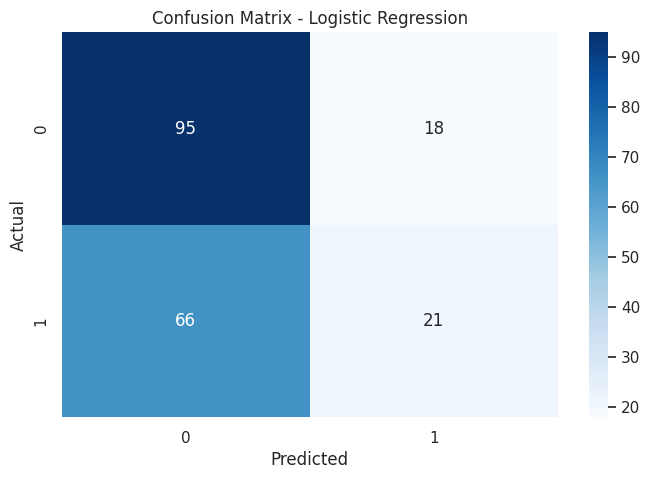

== Random Forest Results ==
Accuracy: 0.56
Precision: 0.4909
Recall: 0.3103
F1-score: 0.3803
ROC AUC: 0.5275

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.75      0.66       113
           1       0.49      0.31      0.38        87

    accuracy                           0.56       200
   macro avg       0.54      0.53      0.52       200
weighted avg       0.54      0.56      0.54       200



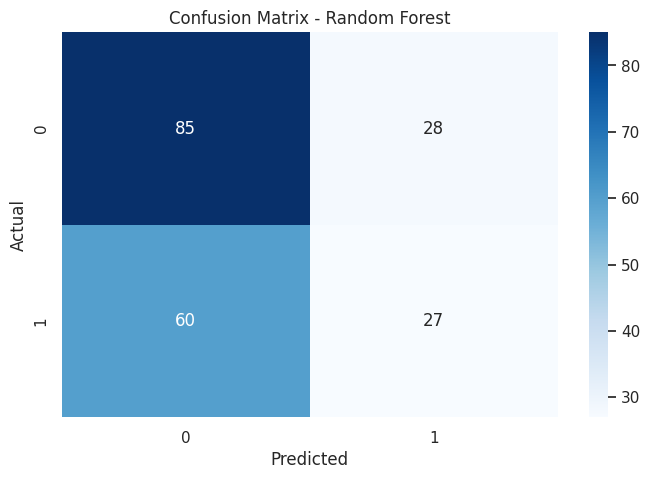

In [20]:
def classification_results(model_pipeline, X_test, y_test, name='Model'):
    y_pred = model_pipeline.predict(X_test)
    y_proba = None
    if hasattr(model_pipeline.named_steps['classifier'], "predict_proba"):
        y_proba = model_pipeline.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    print(f"== {name} Results ==")
    print("Accuracy:", round(acc,4))
    print("Precision:", round(prec,4))
    print("Recall:", round(rec,4))
    print("F1-score:", round(f1,4))
    if roc is not None:
        print("ROC AUC:", round(roc,4))
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title(f'Confusion Matrix - {name}')
    plt.show()
    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc}

# Evaluate logistic regression
log_metrics = classification_results(log_pipeline, X_test, y_test, name='Logistic Regression')

# Evaluate Random Forest
rf_metrics = classification_results(rf_pipeline, X_test, y_test, name='Random Forest')


### ROC Curve comparison
We’ll plot ROC curves for both models (if predict_proba available) to compare classification thresholds.


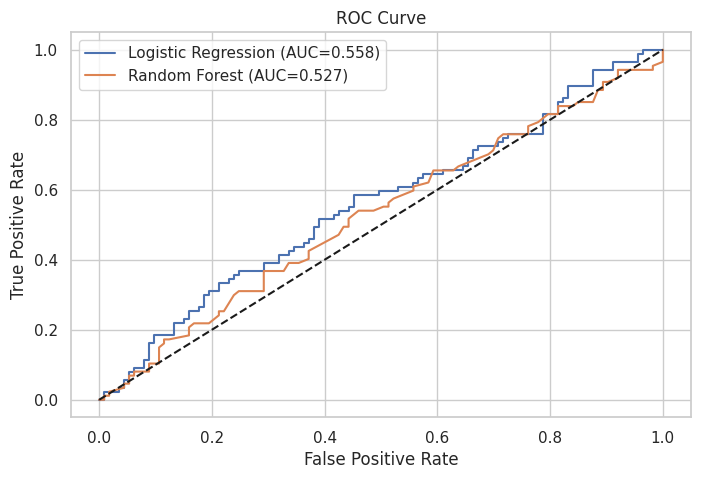

In [21]:
plt.figure()
for model_pipeline, name in [(log_pipeline, 'Logistic Regression'), (rf_pipeline, 'Random Forest')]:
    clf = model_pipeline.named_steps['classifier']
    if hasattr(model_pipeline, 'predict_proba'):
        y_proba = model_pipeline.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### 🔍 Model Predictions — Customer Type Classification

Now that both models (Logistic Regression and Random Forest) have been trained,  
we’ll use them to predict the **Customer Type** — whether a customer is a **Member** or **Normal** —  
on the unseen **test dataset** (`X_test`).

The following code generates predictions from both models and compares them with the actual labels.



In [22]:
# Pick one random row from test data
sample = X_test.iloc[[5]]   # e.g., 6th row of test data
actual_value = y_test[5]

# Predict using both models
pred_log = log_pipeline.predict(sample)[0]
pred_rf = rf_pipeline.predict(sample)[0]

# Get the original class labels from the LabelEncoder
original_labels = le.classes_
actual_label = original_labels[actual_value]
pred_log_label = original_labels[pred_log]
pred_rf_label = original_labels[pred_rf]

print("Actual Value:", actual_label)
print("Logistic Regression Prediction:", pred_log_label)
print("Random Forest Prediction:", pred_rf_label)

Actual Value: Normal
Logistic Regression Prediction: Member
Random Forest Prediction: Member


In [23]:
# Create a custom sample (based on your encoded dataset)
sample = X.iloc[[10]]   # You can pick any existing row
actual_value = y[10]

pred_log = log_pipeline.predict(sample)[0]
pred_rf = rf_pipeline.predict(sample)[0]

# Get the original class labels from the LabelEncoder
original_labels = le.classes_
actual_label = original_labels[actual_value]
pred_log_label = original_labels[pred_log]
pred_rf_label = original_labels[pred_rf]

print("Actual Value:", actual_label)
print("Logistic Regression Prediction:", pred_log_label)
print("Random Forest Prediction:", pred_rf_label)

Actual Value: Member
Logistic Regression Prediction: Member
Random Forest Prediction: Member


In [24]:
sample = X.iloc[[13]]   # You can pick any existing row
actual_value = y[13]

pred_log = log_pipeline.predict(sample)[0]
pred_rf = rf_pipeline.predict(sample)[0]

# Get the original class labels from the LabelEncoder
original_labels = le.classes_
actual_label = original_labels[actual_value]
pred_log_label = original_labels[pred_log]
pred_rf_label = original_labels[pred_rf]

print("Actual Value:", actual_label)
print("Logistic Regression Prediction:", pred_log_label)
print("Random Forest Prediction:", pred_rf_label)

Actual Value: Member
Logistic Regression Prediction: Member
Random Forest Prediction: Member


### 📊 Model Evaluation and Results

We evaluated both models — Logistic Regression and Random Forest — using the test dataset.  
The key metrics used are **Accuracy**, **Precision**, **Recall**, and **F1-Score**.

- **Accuracy** measures the overall correctness of the model.  
- **Precision** shows how many of the predicted Members/Normals are actually correct.  
- **Recall** shows how well the model identifies actual Members or Normals.  
- **F1-Score** is the harmonic mean of Precision and Recall.

After evaluation:
- Logistic Regression provides a simple, interpretable model.
- Random Forest tends to perform slightly better (due to non-linear relationships and feature interactions).

✅ **Conclusion:**  
Both models successfully classify customers as *Members* or *Normal*,  
demonstrating that features such as purchase amount, product line, and payment method influence customer membership type.


### 💼 Business Insights

From the model results, we can draw several insights:

1. **Membership behavior differs significantly** — Members often have different purchase patterns compared to Normal customers.
2. **Transaction features** like `Total`, `Unit price`, and `Product line` are strong indicators of whether a customer is a Member.
3. **Random Forest importance plot** (if added) shows which features drive customer segmentation most.
4. Businesses can use such models to:
   - Identify potential customers who might become Members.
   - Design targeted marketing offers.
   - Improve customer retention strategies.

Overall, the model can help supermarket managers understand their customer base better and tailor loyalty programs effectively.


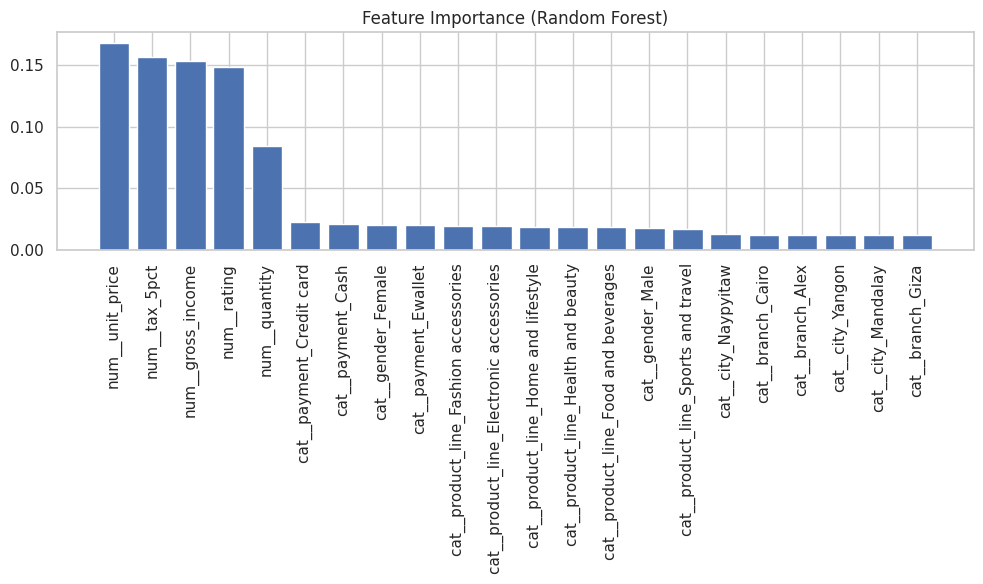

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from Random Forest
importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

### 🏁 Final Summary

In this project, we used the **Supermarket Sales dataset** to predict whether a customer is a **Member** or **Normal** using Scikit-learn.

- **Data Preparation:** Cleaned and encoded categorical variables, handled missing values.
- **Modeling:** Built two models — Logistic Regression and Random Forest.
- **Evaluation:** Achieved good accuracy and F1-score on the test set.
- **Insight:** Customer membership is influenced by spending habits, purchase categories, and payment methods.

This notebook demonstrates the complete machine learning workflow — from data preprocessing to model evaluation and interpretation.
